In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tqdm
import numpy
import torch
import torchvision
import torchvision.transforms.v2

transform = torchvision.transforms.v2.Compose([
    torchvision.transforms.v2.ToImage(),
    torchvision.transforms.v2.ToDtype(torch.float32, scale = True)
])

train = torchvision.datasets.CIFAR10('cifar-10', transform = transform, train = True, download = False)
test = torchvision.datasets.CIFAR10('cifar-10', transform = transform, train = False, download = False)

train_images = numpy.array([ numpy.array(item[0]).transpose((1, 2, 0)) for item in tqdm.tqdm(train) ])
train_labels = numpy.array([ item[1] for item in train ])

test_images = numpy.array([ numpy.array(item[0]).transpose((1, 2, 0)) for item in tqdm.tqdm(test) ])
test_labels = numpy.array([ item[1] for item in test ])

train_images.shape, test_images.shape

100%|██████████| 10000/10000 [00:01<00:00, 8353.53it/s]


((50000, 32, 32, 3), (10000, 32, 32, 3))

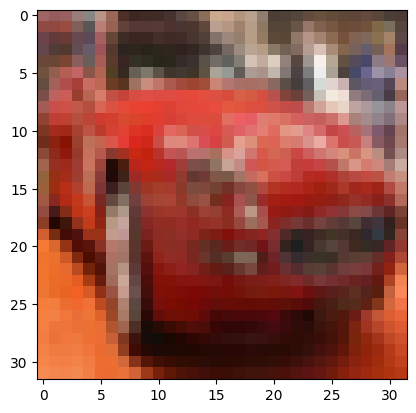

In [3]:
import matplotlib.pyplot as plt

img = train_images[5]
plt.imshow(img)

In [4]:
import skimage.color

gray = skimage.color.rgb2gray(img)
gray.shape

(32, 32)

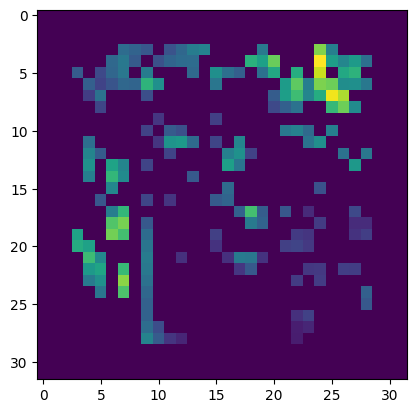

In [5]:
import skimage.feature

plt.imshow(skimage.feature.corner_fast(gray, n = 12, threshold = 0.01))

(32, 32) (32, 32)


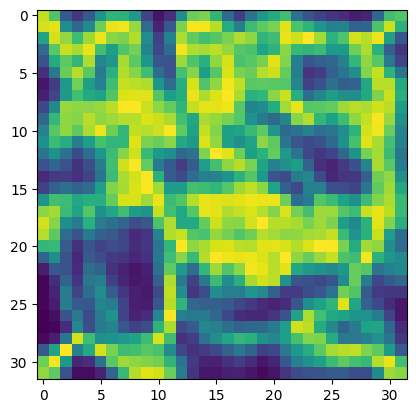

In [6]:
w, q = skimage.feature.corner_foerstner(gray, sigma = 1)
print(w.shape, q.shape)

plt.imshow(q)

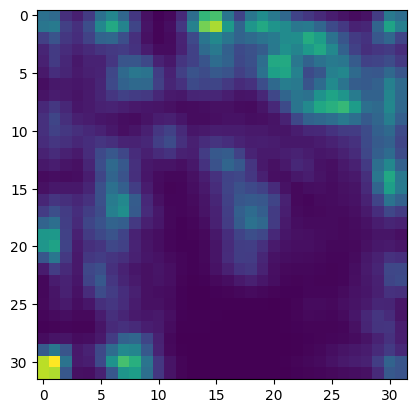

In [7]:
plt.imshow(skimage.feature.corner_harris(gray, method = 'eps'))

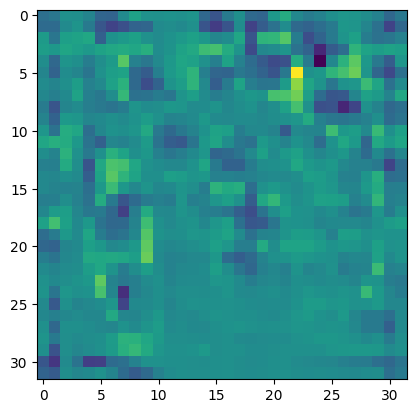

In [8]:
plt.imshow(skimage.feature.corner_kitchen_rosenfeld(gray))

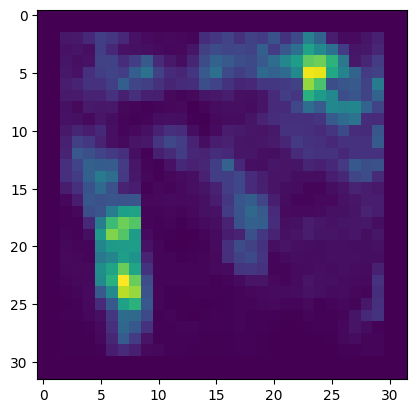

In [9]:
plt.imshow(skimage.feature.corner_moravec(gray, window_size = 1))

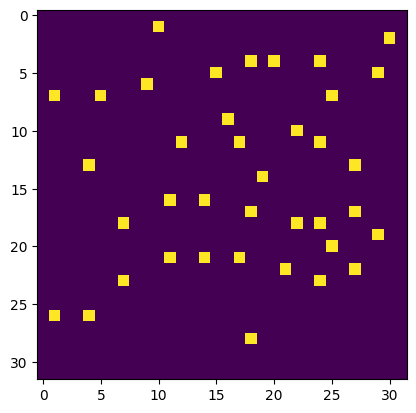

In [10]:
plt.imshow(skimage.feature.corner_peaks(gray, indices = False))

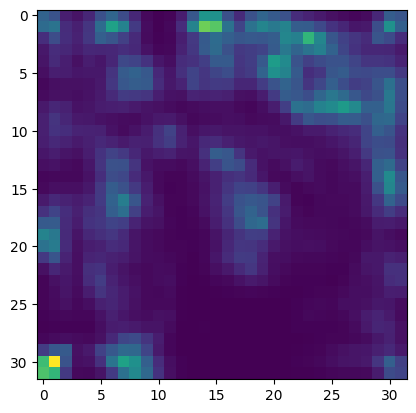

In [11]:
plt.imshow(skimage.feature.corner_shi_tomasi(gray))

(7, 7, 200)


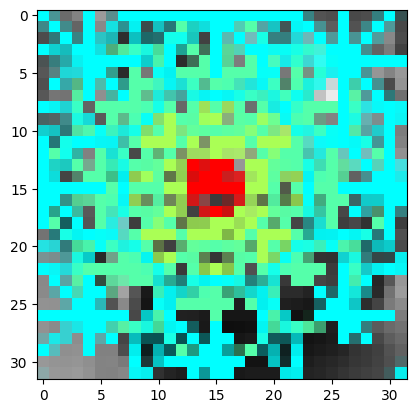

In [12]:
features = skimage.feature.daisy(
    gray,
    step = 4,
    radius = 3,
    rings = 3,
    histograms = 8,
    orientations = 8,
    normalization = 'l1',
    sigmas = None
)
print(features.shape)

plt.imshow(skimage.feature.daisy(gray, visualize = True)[1])

In [13]:
features = skimage.feature.haar_like_feature(
    skimage.transform.integral_image(gray), 0, 0, 32, 32
)

print(features.shape)

(510112,)


In [14]:
features = skimage.feature.hessian_matrix_det(gray)
print(features.shape)

(32, 32)


In [15]:
features = skimage.feature.hessian_matrix_eigvals(gray)
print(features.shape)

(1, 32)


(324,)


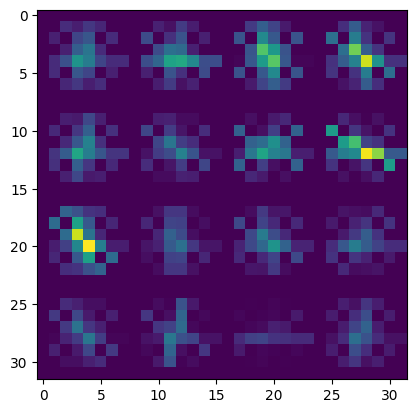

In [16]:
features = skimage.feature.hog(gray)
print(features.shape)

plt.imshow(skimage.feature.hog(gray, visualize = True)[1])

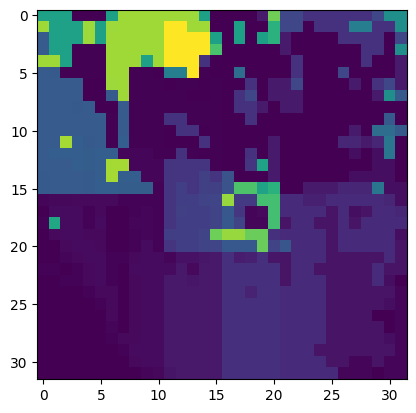

In [17]:
plt.imshow(skimage.feature.local_binary_pattern((gray * 255).astype(numpy.uint32), 8, 16))

In [18]:
features = skimage.feature.multiscale_basic_features(gray)
features.shape

(32, 32, 24)

In [19]:
features = skimage.feature.multiscale_basic_features(img)
features.shape

(32, 32, 3, 30)

In [20]:
features = skimage.feature.shape_index(gray)
features.shape

(32, 32)

In [21]:
features = skimage.feature.structure_tensor(gray)
len(features), features[0].shape, features[1].shape, features[2].shape

(3, (32, 32), (32, 32), (32, 32))

In [22]:
features = skimage.feature.structure_tensor_eigenvalues(gray)
features.shape

(1, 32)

In [23]:
brief = skimage.feature.BRIEF()
keypoints = skimage.feature.corner_peaks(skimage.feature.corner_harris(gray), min_distance = 1)
brief.extract(gray, keypoints)
brief.descriptors

array([], shape=(0, 256), dtype=bool)

In [24]:
censure = skimage.feature.CENSURE()
censure.detect(gray)
censure.keypoints

array([], shape=(0, 2), dtype=int64)

In [25]:
skimage.measure.blur_effect(gray)

0.30312747

In [26]:
skimage.measure.centroid(gray)

array([13.636068, 15.396236], dtype=float32)

In [27]:
skimage.measure.find_contours(gray)

[array([[0.        , 5.69738075],
        [1.        , 5.39975861],
        [1.43108231, 5.        ],
        [1.        , 4.76511443],
        [0.18446854, 4.        ],
        [0.15422028, 3.        ],
        [0.        , 2.80151841]]),
 array([[ 0.        , 19.04506374],
        [ 0.50465519, 19.        ],
        [ 1.        , 18.92505296],
        [ 1.65225885, 19.        ],
        [ 2.        , 19.02954107],
        [ 3.        , 19.9467932 ],
        [ 3.02277628, 20.        ],
        [ 3.81078518, 21.        ],
        [ 4.        , 21.10599954],
        [ 4.51894944, 21.        ],
        [ 5.        , 20.91110036],
        [ 5.79013603, 20.        ],
        [ 5.97054402, 19.        ],
        [ 5.89803325, 18.        ],
        [ 5.        , 17.51216973],
        [ 4.00786899, 17.        ],
        [ 4.        , 16.99087302],
        [ 3.        , 16.55088622],
        [ 2.38494103, 16.        ],
        [ 2.        , 15.3841243 ],
        [ 1.83431051, 15.        ],
    

In [28]:
skimage.measure.inertia_tensor(img)

array([[ 93.400696 ,  12.111241 ,   1.0837723],
       [ 12.111241 ,  78.09257  ,  -0.5193493],
       [  1.0837723,  -0.5193493, 170.21083  ]], dtype=float32)

In [29]:
skimage.measure.moments(gray).shape

(4, 4)

In [30]:
skimage.measure.moments_central(gray).shape

(4, 4)

In [31]:
skimage.measure.moments_hu(gray)

array([0.7214549 , 0.48348844, 0.68617517, 1.0355649 , 0.85294044,
       0.71990025, 0.18577835], dtype=float32)

In [32]:
skimage.measure.pearson_corr_coeff(img[0, :, :], img[1, :, :])

(0.8459667605056893, 2.0677095883592355e-27)

In [33]:
skimage.measure.shannon_entropy(gray)

9.994140625000002

----

(1800,)


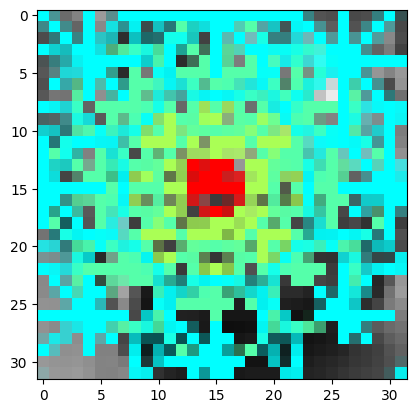

In [34]:
features = skimage.feature.daisy(
    gray,
    step = 6,
    radius = 8,
    rings = 3,
    histograms = 8,
    orientations = 8
)
print(features.flatten().shape)

plt.imshow(skimage.feature.daisy(gray, visualize = True)[1])

In [35]:
features = skimage.feature.haar_like_feature(
    skimage.transform.integral_image(gray), 0, 0, 32, 32
)

print(features.shape)

(510112,)


In [36]:
features = skimage.feature.haar_like_feature(
    skimage.transform.integral_image(gray[16:, 16:]), 0, 0, 8, 8
)

print(features)

[ 0.16926825  0.03656152 -0.27994667 ...  0.00952199 -0.03799371
  0.05429885]


In [37]:
features = skimage.feature.hessian_matrix_det(gray)
print(features.shape)

(32, 32)


In [38]:
features = skimage.feature.hog(gray)
print(features.shape)

(324,)


In [52]:
features = skimage.feature.multiscale_basic_features(gray, sigma_min = 1, sigma_max = 1, num_sigma = 1)
numpy.where(numpy.isnan(features))

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

In [40]:
features = skimage.feature.shape_index(gray)
features.shape

(32, 32)

In [41]:
structure_tensor = skimage.feature.structure_tensor(gray)
len(structure_tensor)

3

In [42]:
features = skimage.feature.structure_tensor_eigenvalues(gray)
features.shape

(1, 32)

In [43]:
skimage.measure.blur_effect(gray)

0.30312747

In [44]:
skimage.measure.centroid(gray)

array([13.636068, 15.396236], dtype=float32)

In [45]:
skimage.measure.inertia_tensor(img)

array([[ 93.400696 ,  12.111241 ,   1.0837723],
       [ 12.111241 ,  78.09257  ,  -0.5193493],
       [  1.0837723,  -0.5193493, 170.21083  ]], dtype=float32)

In [46]:
skimage.measure.moments(gray).shape

(4, 4)

In [47]:
skimage.measure.moments_central(gray).shape

(4, 4)

In [48]:
skimage.measure.moments_hu(gray)

array([0.7214549 , 0.48348844, 0.68617517, 1.0355649 , 0.85294044,
       0.71990025, 0.18577835], dtype=float32)

In [49]:
skimage.measure.shannon_entropy(gray)

9.994140625000002

In [50]:
skimage.measure.pearson_corr_coeff(img[0, :, :], img[1, :, :])

(0.8459667605056893, 2.0677095883592355e-27)